# Code Similarity: A Machine Learning Project

## Project Inicialization

In [17]:
import json, time, os
# from parser.parser import *
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

PROJECTS_FOLDER = f'{os.getcwd()}/Projects/'

DATA_FOLDER = f'{os.getcwd()}/data/'

os.makedirs(DATA_FOLDER, exist_ok=True)
pd.set_option('display.max_columns', None)


## Extrayendo Los AST

In [18]:

# PROJECTS_FOLDER = f'{os.getcwd()}/Projects/'

# DATA_FOLDER = f'{os.getcwd()}/data/'

# os.makedirs(DATA_FOLDER, exist_ok=True)

# project_features = []

# for f in os.scandir(PROJECTS_FOLDER):
#     if f.is_dir():
#         print(PROJECTS_FOLDER + f.name)
        
#         features = process_project(PROJECTS_FOLDER + f.name)
#         features['project_name'] = f.name
#         project_features.append(features)

# # Generar un nombre de archivo JSON único usando la marca de tiempo
# timestamp = time.strftime("%Y%m%d-%H%M%S")
# output_json_path = os.path.join(DATA_FOLDER, f"features_{timestamp}.json")

# # Guardar los features en un archivo JSON
# with open(output_json_path, 'w', encoding='utf-8') as json_file:
#     json.dump(project_features, json_file, ensure_ascii=False, indent=4)
  

## Features Extraídos y su Importancia:

1. **`total_nodes`**
   - **Descripción**: Número total de nodos visitados en el árbol de sintaxis.
   - **Importancia**: Indica el tamaño del código fuente y la complejidad general del análisis.

2. **`node_count`**
   - **Descripción**: Diccionario que mantiene el conteo de cada tipo de nodo encontrado.
   - **Importancia**: Permite identificar qué tipos de constructos de lenguaje se utilizan más frecuentemente.

3. **`max_depth`**
   - **Descripción**: Profundidad máxima alcanzada en el árbol de sintaxis.
   - **Importancia**: Una mayor profundidad puede indicar una estructura de código más compleja y anidada.

4. **`variables`**
   - **Descripción**: Número de variables declaradas en el código.
   - **Importancia**: Indica la cantidad de almacenamiento local usado, lo cual puede reflejar la complejidad del estado manejado por el programa.

5. **`constants`**
   - **Descripción**: Número de constantes declaradas.
   - **Importancia**: Las constantes pueden indicar valores inmutables importantes y buenas prácticas de programación.

6. **`out_variables`**
   - **Descripción**: Número de variables de salida (out) declaradas.
   - **Importancia**: Las variables de salida son importantes para el flujo de datos y la gestión de resultados en métodos.

7. **`methods`**
   - **Descripción**: Número de métodos definidos.
   - **Importancia**: Ayuda a medir la modularidad y el tamaño funcional del código.

8. **`classes`**
   - **Descripción**: Número de clases definidas.
   - **Importancia**: Permite entender la estructura orientada a objetos del código.

9. **`interfaces`**
   - **Descripción**: Número de interfaces definidas.
   - **Importancia**: Las interfaces son cruciales para la abstracción y la definición de contratos en programación orientada a objetos.

10. **`abstract_classes`**
    - **Descripción**: Número de clases abstractas definidas.
    - **Importancia**: Las clases abstractas indican puntos de extensión y abstracción.

11. **`sealed_classes`**
    - **Descripción**: Número de clases selladas definidas.
    - **Importancia**: Las clases selladas indican clases que no pueden ser heredadas, lo cual puede ser útil para seguridad y optimización.

12. **`import_statements`**
    - **Descripción**: Número de declaraciones de importación (`using`).
    - **Importancia**: Refleja las dependencias y bibliotecas externas utilizadas en el código.

13. **`function_calls`**
    - **Descripción**: Número de llamadas a funciones.
    - **Importancia**: Indica el uso y la frecuencia de las funciones en el código.

14. **`try_catch_blocks`**
    - **Descripción**: Número de bloques try-catch.
    - **Importancia**: Refleja el manejo de excepciones y la robustez del código ante errores.

15. **`lists`**
    - **Descripción**: Número de listas utilizadas en el código.
    - **Importancia**: Las listas son estructuras de datos importantes y su uso puede indicar la gestión de colecciones.

16. **`dicts`**
    - **Descripción**: Número de diccionarios utilizados en el código.
    - **Importancia**: Los diccionarios son estructuras de datos importantes para el almacenamiento de pares clave-valor.

17. **`variable_names`**
    - **Descripción**: Conjunto de nombres de variables únicas.
    - **Importancia**: Ayuda a la identificación y análisis de la nomenclatura y la reutilización de nombres.

18. **`method_names`**
    - **Descripción**: Conjunto de nombres de métodos únicos.
    - **Importancia**: Útil para la identificación y análisis de la nomenclatura de métodos.

19. **`method_lengths`**
    - **Descripción**: Lista con la longitud de cada método.
    - **Importancia**: Métodos más largos pueden ser más complejos y difíciles de mantener.

20. **`class_names`**
    - **Descripción**: Conjunto de nombres de clases únicas.
    - **Importancia**: Ayuda a la identificación y análisis de la nomenclatura de clases.

21. **`interface_names`**
    - **Descripción**: Conjunto de nombres de interfaces únicas.
    - **Importancia**: Útil para la identificación y análisis de la nomenclatura de interfaces.

22. **`enum_names`**
    - **Descripción**: Conjunto de nombres de enumeraciones únicas.
    - **Importancia**: Mejora la legibilidad y la mantenibilidad del código, indicando constantes relacionadas.

23. **`delegate_names`**
    - **Descripción**: Conjunto de nombres de delegados únicos.
    - **Importancia**: Facilita la comprensión y el seguimiento de las referencias de métodos pasados como argumentos.

24. **`distinct_tokens`**
    - **Descripción**: Diccionario de tokens distintos y su conteo.
    - **Importancia**: Permite comprender la diversidad y la frecuencia de los tokens utilizados en el código.

25. **`control_structures`**
    - **Descripción**: Diccionario que cuenta las estructuras de control (`if`, `switch`, `for`, `while`, `dowhile`).
    - **Importancia**: Ayuda a entender el flujo lógico y las decisiones en el código.

26. **`access_modifiers_methods`**
    - **Descripción**: Diccionario que cuenta los modificadores de acceso en métodos (`public`, `private`, `protected`, etc.).
    - **Importancia**: Los modificadores indican la visibilidad y el control de acceso de los métodos, crucial para la encapsulación y la seguridad del código.

27. **`other_modifiers`**
    - **Descripción**: Diccionario que cuenta otros modificadores (`readonly`, `volatile`, `virtual`, `override`, etc.).
    - **Importancia**: Indican comportamientos especiales de métodos y variables, afectando la semántica y optimización del código.

28. **`library_calls`**
    - **Descripción**: Diccionario que cuenta las llamadas a ciertas bibliotecas (`Console`, `Math`).
    - **Importancia**: Refleja el uso de bibliotecas estándar y puede indicar dependencias clave en el código.

29. **`linq_queries`**
    - **Descripción**: Diccionario que cuenta las diferentes consultas LINQ utilizadas (`Select`, `Where`, `OrderBy`, etc.).
    - **Importancia**: LINQ es una característica poderosa en C# para manejar colecciones y datos, y su uso puede indicar un enfoque funcional en el código.

30. **`method_return_types`**
    - **Descripción**: Diccionario que almacena los tipos de retorno de los métodos.
    - **Importancia**: Permite comprender los tipos de datos devueltos por los métodos, lo cual es crucial para el análisis de tipos y la comprensión del flujo de datos.

31. **`method_parameters`**
    - **Descripción**: Diccionario que almacena los parámetros de los métodos.
    - **Importancia**: Proporciona información sobre la firma de los métodos, ayudando a entender cómo se intercambian los datos en el programa.

32. **`number_of_enums`**
    - **Descripción**: Número de enumeraciones (enum) definidas.
    - **Importancia**: Los enums proporcionan una manera de definir conjuntos de constantes relacionadas, mejorando la legibilidad y la mantenibilidad del código.

33. **`number_of_delegates`**
    - **Descripción**: Número de delegados definidos.
    - **Importancia**: Los delegados son tipos que representan referencias a métodos, permitiendo pasar métodos como argumentos.  

34. **`number_of_lambdas`**
   - **Descripción**: Número de expresiones lambda utilizadas.
   - **Importancia**: Las expresiones lambda son una forma concisa de escribir métodos anónimos y son clave para la programación funcional y las consultas LINQ.

35. **`number_of_getters_setters`**
   - **Descripción**: Número de getters y setters definidos en propiedades.
   - **Importancia**: Los getters y setters controlan el acceso a los datos de una clase y son esenciales para la encapsulación y la validación de datos.

36. **`number_of_tuples`**
   - **Descripción**: Número de tuplas utilizadas.
   - **Importancia**: Las tuplas son útiles para devolver múltiples valores de un método y pueden simplificar la estructura de datos en el código.

37. **`number_of_namespaces`**
    - **Descripción**: Número de espacios de nombres definidos.
    - **Importancia**: Los espacios de nombres organizan el código en grupos lógicos y evitan conflictos de nombres.


## MOSS Baseline

## Data Loading

In [19]:
raw_data = pd.read_json('data/merged_features.json')
raw_data

,total_nodes,max_depth,number_of_variables,number_of_constants,out_variables,ref_params,number_of_methods,number_of_classes,number_of_interfaces,number_of_abstract_classes,number_of_sealed_classes,import_statements,number_of_try_blocks,number_of_lists,number_of_dictionaries,number_of_enums,number_of_delegates,function_calls,control_structures_if,control_structures_switch,control_structures_for,control_structures_while,control_structures_dowhile,access_modifiers_public,access_modifiers_private,access_modifiers_protected,access_modifiers_internal,access_modifiers_static,access_modifiers_protected_internal,access_modifiers_private_protected,modifier_readonly,modifier_volatile,modifier_virtual,modifier_override,modifier_new,modifier_partial,modifier_extern,modifier_unsafe,modifier_async,linq_querie_select,linq_queries_where,linq_queries_orderBy,linq_queries_groupBy,linq_queries_join,linq_queries_sum,linq_queries_count,library_call_console,library_call_math,number_of_lambdas,number_of_getters,number_of_setters,number_of_tuples,number_of_namespaces,node_count,project_name,label,project_type,variable_names_vector,delegate_names_vector,method_return_types_vector,method_names_vector,class_names_vector,interface_names_vector,enums_names_vector,method_parameters_vector
0,134895,3130,154,0,0,0,152,33,33,0,0,31,13,9,5,0,0,413,234,3,22,3,0,285,46,20,0,54,0,0,0,0,18,11,45,2,0,0,0,10,0,0,0,0,28,0,0,1,3,126,74,0,50,"{'Compilation_unitContext': 56, 'Namespace_mem...",JoseMiguel01012570345_Domino,original,domino,"[-0.012726657092571002, 0.015388422645628001, ...",[],"[-0.020707672461867003, 0.026297831907868004, ...","[-0.010017288848757001, 0.013559108600020001, ...","[-0.002490584738552, 0.005718902219086001, 0.0...","[-0.0034030620008700004, 0.0055966735817490005...",[],"[-0.010241279378533, 0.013796883635222001, 0.0..."
1,50908,929,99,0,0,0,62,35,0,0,0,13,9,7,1,0,0,79,136,12,17,1,0,123,28,3,0,8,0,0,0,0,0,28,29,0,0,0,0,0,0,0,0,0,3,0,2,6,6,14,11,0,9,"{'Compilation_unitContext': 17, 'Using_directi...",Ramonconda_HulkProjec,original,hulk,"[0.002499217400327, 0.0018413322977720002, 0.0...",[],"[0.0013908025575800002, 0.0027287723496550002,...","[0.0006110234535290001, 0.0012744109844780001,...","[0.000853140198159, 0.00027786512509900003, 5....",[],[],"[-0.002294766483828, 0.005734340287744001, 0.0..."
2,21992,830,26,5,0,0,33,12,0,0,0,11,4,0,0,0,0,26,25,0,5,0,0,60,54,4,7,19,0,0,25,0,0,11,22,0,0,0,0,4,4,0,0,0,13,0,1,9,17,7,4,0,12,"{'Compilation_unitContext': 15, 'Using_directi...",0mar-rivero_moogle-2021,original,moogle,"[-0.004004274494946, 0.0037407751660790004, 0....",[],"[0.000608267495408, 0.0025440196041010004, -0....","[-0.0012229366693640002, -0.000522482441738, 0...","[-0.0017937920056280002, 0.0030078215058890003...",[],[],"[-0.00045094915549200005, -0.00010345679766, 0..."
3,38989,549,106,0,0,0,36,7,0,0,0,6,1,2,4,1,0,105,85,5,2,13,0,51,11,0,0,2,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,30,0,5,6,0,6,3,0,7,"{'Compilation_unitContext': 7, 'Using_directiv...",kmy-cyber_INTERPRETE-C--to-HULK,original,hulk,"[0.000262182526057, 0.0011837051715700001, -0....",[],"[-0.0010048762196670001, 0.003144263057038, -0...","[0.001262618694454, 0.001120802015066, -0.0018...","[-0.000535695871803, 0.001842815778218, 0.0024...",[],"[-0.00034204794792400004, 0.00410747108981, 0....","[3.640579598140903e-05, 0.002426245948299, -0...."
4,33426,859,109,0,0,0,28,9,0,0,0,1,0,3,1,0,0,44,69,0,41,0,0,73,1,0,0,54,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,2,0,0,6,0,32,31,1,9,"{'Compilation_unitContext': 10, 'Using_directi...",RodryJR_moogle,original,moogle,"[-0.0015021869912740001, 0.0031298745889210004...",[],"[-0.0014544894220300001, 0.002984559163451, 0....","[0.0006193788140080001, -0.0003405834140720000...","[0.001954318024218, 0.000805227609816, 0.00319...",[],[],"[0.0007984451949590001, -0.0003205263928970000..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [20]:
# Step 1: Identify columns with list values dynamically
list_columns = [col for col in raw_data.columns if isinstance(raw_data[col].iloc[0], list)]

# Step 2-4: Expand and concatenate for each list column
for list_column in list_columns:
    # Expand the lists into multiple columns
    expanded_cols = pd.DataFrame(raw_data[list_column].tolist(), index=raw_data.index)
    
    # Rename the expanded columns to match desired output
    expanded_cols.columns = [f'{list_column}-{i+1}' for i in range(expanded_cols.shape[1])]
    
    # Drop the original list column and concatenate the expanded columns
    raw_data = raw_data.drop(columns=[list_column]).join(expanded_cols)

# Replace NaN with appropriate values if needed (e.g., 0 or '')
raw_data = raw_data.fillna(np.nan)  # Or any other value like 0 or ''

# raw_data[['interface_names_vector-1', 'project_name', 'label']]

original_data = raw_data

raw_data = raw_data.drop(columns = ['project_type', 'label', 'delegate_names_vector-1', 'delegate_names_vector-2', 'node_count', 'project_name', 'modifier_volatile', 'access_modifiers_private_protected', 'access_modifiers_protected_internal', 'control_structures_dowhile', 'number_of_sealed_classes', 'modifier_volatile', 'modifier_unsafe', 'linq_queries_groupBy', 'linq_queries_count', 'modifier_extern'])
raw_data = raw_data.fillna(0)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Columns: 942 entries, total_nodes to method_parameters_vector-200
dtypes: float64(898), int64(44)
memory usage: 728.7 KB


## Difference Data

In [21]:
import itertools
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
# from listener import 

numeric_data = raw_data.select_dtypes(include=['float64', 'int64'])
project_type = original_data['project_type']

component_wise_differences = []

### Same project
sp_component_wise_diferences = []
### Diferent project
dp_component_wise_diferences = []

for (index1, row1), (index2, row2) in itertools.combinations(numeric_data.iterrows(), 2):
    difference = np.abs(row1.values - row2.values)
    component_wise_differences.append([index1, index2] + list(difference) + [int(project_type[index1] == project_type[index2])])
    if project_type[index1] == project_type[index2]:
        sp_component_wise_diferences.append([index1,index2]+list(difference) + [1])
    else:
        dp_component_wise_diferences.append([index1,index2]+list(difference) + [0])
        


columns = ['Index1', 'Index2'] + list(numeric_data.columns) + ['same_project']
# columns = list(numeric_data.columns)
component_wise_df = pd.DataFrame(component_wise_differences, columns=columns)
component_wise_df.head()
component_wise_df

Index1  Index2  total_nodes  max_depth  number_of_variables  \
0          0       1      83987.0     2201.0                 55.0   
1          0       2     112903.0     2300.0                128.0   
2          0       3      95906.0     2581.0                 48.0   
3          0       4     101469.0     2271.0                 45.0   
4          0       5     119915.0     2807.0                 60.0   
...      ...     ...          ...        ...                  ...   
4846      95      97       2424.0      629.0                 52.0   
4847      95      98      54934.0     1251.0                 76.0   
4848      96      97      10643.0      571.0                 14.0   
4849      96      98      63153.0     1193.0                114.0   
4850      97      98      52510.0      622.0                128.0   

      number_of_constants  out_variables  ref_params  number_of_methods  \
0                     0.0            0.0         0.0               90.0   
1                     5.0            0.0         0.0              119.0   
2                     0.0            0.0         0.0              116.0   
3                     0.0            0.0         0.0              124.0   
4                     0.0            0.0         0.0              134.0   
...                   ...            ...         ...                ...   
4846                  0.0            0.0         0.0                2.0   
4847                  0.0            0.0         0.0               74.0   
4848                  0.0            0.0         0.0                5.0   
4849                  0.0            0.0         0.0               77.0   
4850                  0.0            0.0         0.0               72.0   

      number_of_classes  number_of_interfaces  number_of_abstract_classes  \
0                   2.0                  33.0                         0.0   
1                  21.0                  33.0                         0.0   
2                  26.0                  33.0                         0.0   
3                  24.0                  33.0                         0.0   
4                  29.0                  33.0                         0.0   
...                 ...                   ...                         ...   
4846                6.0                   0.0                         0.0   
4847               64.0                   0.0                         0.0   
4848               12.0                   0.0                         0.0   
4849               70.0                   0.0                         0.0   
4850               58.0                   0.0                         0.0   

      import_statements  number_of_try_blocks  number_of_lists  \
0                  18.0                   4.0              2.0   
1                  20.0                   9.0              9.0   
2                  25.0                  12.0              7.0   
3                  30.0                  13.0              6.0   
4                  30.0                  13.0             10.0   
...                 ...                   ...              ...   
4846                2.0                   1.0              5.0   
4847               16.0                   0.0              4.0   
4848                0.0                   1.0              3.0   
4849               18.0                   0.0              6.0   
4850               18.0                   1.0              9.0   

      number_of_dictionaries  number_of_enums  number_of_delegates  \
0                        4.0              0.0                  0.0   
1                        5.0              0.0                  0.0   
2                        1.0              1.0                  0.0   
3                        4.0              0.0                  0.0   
4                        3.0              0.0                  0.0   
...                      ...              ...                  ...   
4846                     0.0              1.0                  0.0  

In [22]:
### Asegurar que la proporcion entre test y test sea la misma (1, 0)
# component_wise_df

sp_component_wise_df = pd.DataFrame(sp_component_wise_diferences, columns=columns)
# sp_component_wise_df
sp_train_df, sp_test_df = train_test_split(sp_component_wise_df, test_size=0.2, random_state=42)

# 
dp_component_wise_df = pd.DataFrame(dp_component_wise_diferences, columns=columns)
# dp_component_wise_df
dp_train_df, dp_test_df = train_test_split(dp_component_wise_df, test_size=0.2, random_state=42)


train_df = pd.concat([dp_train_df,sp_train_df], ignore_index=True)
test_df = pd.concat([dp_test_df,sp_test_df], ignore_index=True)
### Dividir en train y test.


## Selecting Data

In [23]:
data = component_wise_df
# data = raw_data
data = train_df

In [24]:
# Define a function to check if a column should be converted to int
def is_float_int(column):
    return pd.api.types.is_float_dtype(column) and (column % 1 == 0).all()

# Detect and convert columns
int_columns = [col for col in data.columns if is_float_int(data[col])]
data[int_columns] = data[int_columns].astype(int)

# Verify the changes
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Columns: 945 entries, Index1 to same_project
dtypes: float64(898), int64(47)
memory usage: 28.0 MB


## Processing data

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Index1,3880.0,32.712887,23.189148,0.000000e+00,13.000000,29.000000,49.000000,97.000000
Index2,3880.0,65.543041,23.049331,2.000000e+00,49.000000,69.000000,85.000000,98.000000
total_nodes,3880.0,43742.392526,50428.737266,5.000000e+00,11415.750000,25478.000000,56703.000000,289665.000000
max_depth,3880.0,1257.813660,1311.688188,0.000000e+00,307.750000,753.500000,1840.500000,6826.000000
number_of_variables,3880.0,94.414433,129.358689,0.000000e+00,25.000000,55.000000,105.000000,873.000000
...,...,...,...,...,...,...,...,...
method_parameters_vector-197,3880.0,0.012249,0.016539,4.595146e-06,0.002674,0.005871,0.012304,0.124459
method_parameters_vector-198,3880.0,0.012790,0.020213,5.161040e-06,0.002062,0.004713,0.012320,0.094958
method_parameters_vector-199,3880.0,0.008937,0.012746,1.604203e-07,0.001665,0.003882,0.009501,0.070257
method_parameters_vector-200,3880.0,0.009280,0.014087,1.337030e-06,0.001819,0.004196,0.008903,0.107157


In [26]:

same_pt = test_df[test_df['same_project'] == 1]
same_pt

Index1  Index2  total_nodes  max_depth  number_of_variables  \
712      40      64      11656.0      546.0                 12.0   
713      13      93      58857.0     2139.0                106.0   
714      40      74      14086.0      526.0                 76.0   
715      62      72     248707.0     2333.0                 22.0   
716      49      54       1368.0     3399.0                 10.0   
..      ...     ...          ...        ...                  ...   
966       8      12      29360.0      239.0                 79.0   
967      18      86      33075.0     1647.0                 20.0   
968      46      71       5117.0       79.0                  3.0   
969      11      57       3118.0      126.0                 22.0   
970       0      52      63790.0      298.0                 27.0   

     number_of_constants  out_variables  ref_params  number_of_methods  \
712                  0.0            0.0         3.0                7.0   
713                  0.0            0.0         0.0               83.0   
714                  0.0            0.0         0.0               15.0   
715                  0.0            0.0         1.0               28.0   
716                  0.0            0.0         0.0               29.0   
..                   ...            ...         ...                ...   
966                 35.0            0.0         0.0               32.0   
967                  1.0            0.0         0.0               32.0   
968                  0.0            0.0         0.0               14.0   
969                  0.0            0.0         0.0                9.0   
970                  0.0            0.0         0.0               85.0   

     number_of_classes  number_of_interfaces  number_of_abstract_classes  \
712                5.0                   0.0                         0.0   
713               86.0                   5.0                         0.0   
714                3.0                   0.0                         0.0   
715               23.0                   5.0                         0.0   
716               25.0                   1.0                         1.0   
..                 ...                   ...                         ...   
966               12.0                   0.0                         0.0   
967               40.0                   0.0                         0.0   
968                0.0                   0.0                         0.0   
969                0.0                   0.0                         0.0   
970               19.0                  10.0                         0.0   

     import_statements  number_of_try_blocks  number_of_lists  \
712                8.0                   0.0              2.0   
713               24.0                   1.0              9.0   
714               12.0                   0.0             11.0   
715                9.0                   0.0              4.0   
716               55.0                  14.0              6.0   
..                 ...                   ...              ...   
966                7.0                   2.0             60.0   
967               20.0                   5.0              5.0   
968                4.0                   0.0              4.0   
969                1.0                   0.0              0.0   
970               27.0                  12.0             12.0   

     number_of_dictionaries  number_of_enums  number_of_delegates  \
712                     7.0              0.0                  0.0   
713                     0.0              4.0                  0.0   
714                     5.0              0.0                  0.0   
715                     2.0              1.0                  0.0   
716                     1.0              1.0                  0.0   
..                      ...              ...                  ...   
966                     1.0              3.0                  0.0   
967                     0.0              1.0         

<Axes: >

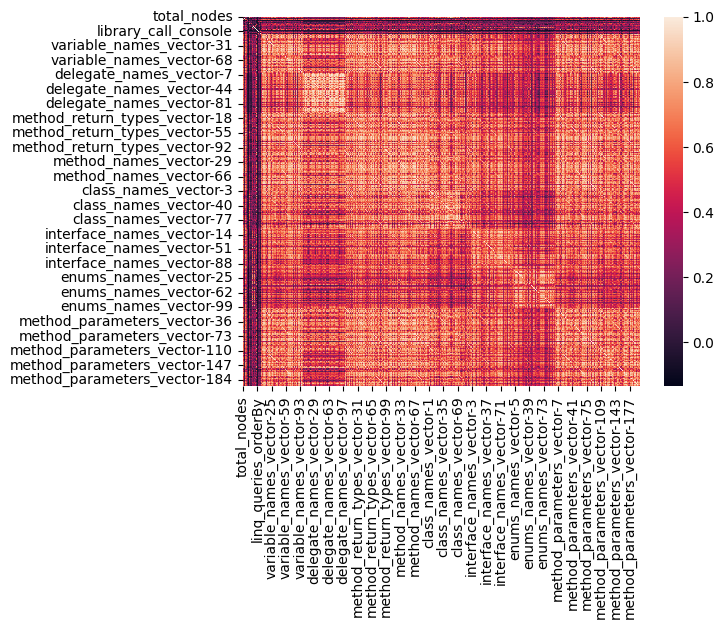

In [27]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# data = data.drop(columns=['Index1', 'Index2'])# TODO: Ubicar bien esto

# Data Normalization
scaler = StandardScaler()
important_data = data.drop(columns=['Index1', 'Index2', 'same_project'])
same_pt = test_df[test_df['same_project'] == 1]
test_df = test_df[test_df['same_project'] == 0]

important_data_test = test_df.drop(columns=['Index1', 'Index2', 'same_project'])
same_pt = same_pt.drop(columns=['Index1', 'Index2', 'same_project'])

scaled_test = pd.DataFrame(scaler.fit_transform(important_data_test), columns=important_data_test.columns)

scaled_data = pd.DataFrame(scaler.fit_transform(important_data), columns=important_data.columns)

same_pt = pd.DataFrame(scaler.fit_transform(same_pt), columns=important_data_test.columns)

# Perform correlation analysis
correlation_matrix = scaled_data.corr()

# Filtering weak correlations
threshold = 1
strong_correlations = correlation_matrix[(correlation_matrix >= threshold) | (correlation_matrix <= -threshold)]

# Visualize the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(strong_correlations, annot=True, cmap='coolwarm', fmt='.2f')
sns.heatmap(correlation_matrix)#TODO: Some values are resulting in NAN, fix this
# plt.show()

In [28]:
strong_correlations['total_nodes']

total_nodes                     1.0
max_depth                       NaN
number_of_variables             NaN
number_of_constants             NaN
out_variables                   NaN
                               ... 
method_parameters_vector-196    NaN
method_parameters_vector-197    NaN
method_parameters_vector-198    NaN
method_parameters_vector-199    NaN
method_parameters_vector-200    NaN
Name: total_nodes, Length: 942, dtype: float64

In [29]:
for feature in data.columns:
    stat, p = stats.shapiro(data[feature].dropna())
    if p > 0.05:
        print(f'{feature} is likely normally distributed (fail to reject H0)')


## One Class SVM

In [30]:
from sklearn.svm import OneClassSVM

# Assuming X_train contains your distance vectors of unique data points
X_train = scaled_data
X_test = scaled_test
# new_data = np.array([...])

# Train One-Class SVM
ocsvm = OneClassSVM(kernel='rbf', gamma='auto')
ocsvm.fit(X_train)

# Combine training and new data for visualization
# combined_data = np.vstack([X_train, new_data])

# Predict on combined data

# pred = ocsvm.predict(combined_data)
pred = ocsvm.decision_function(X_train)
# X_train = X_train.join(aux)
labels = ['Inlier' if p >= 0.5 else 'Outlier' for p in pred]

### T-SNE Dimensionality Reduction Visualization 

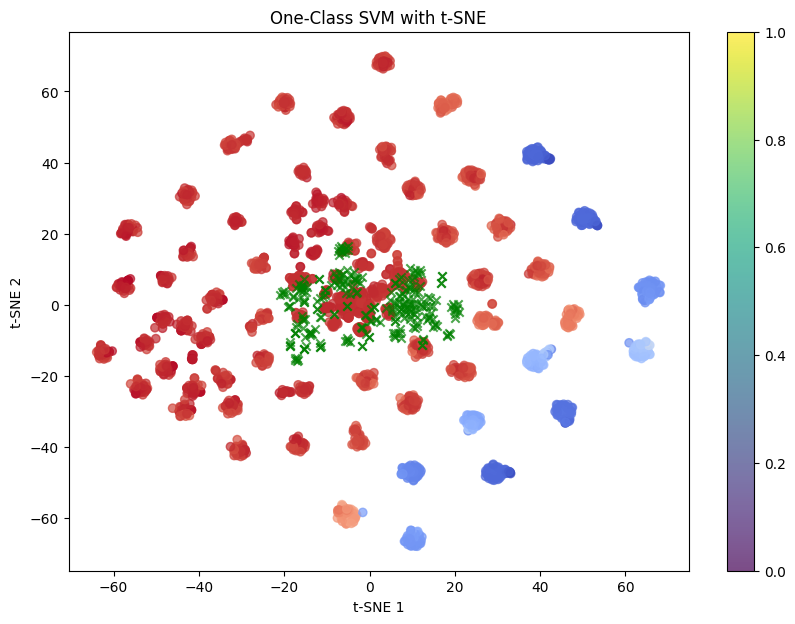

In [31]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)

# tsne_results = tsne.fit_transform(combined_data)
tsne_results = tsne.fit_transform(X_train)
tsne_results_same_pt = tsne.fit_transform(same_pt)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=pred, cmap='coolwarm', alpha=0.7)
plt.scatter(tsne_results_same_pt[:, 0], tsne_results_same_pt[:, 1], marker='x', color='green', alpha=0.7, label='Test Data')
plt.title('One-Class SVM with t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()

### PCA Dimensionality Redution Visualization

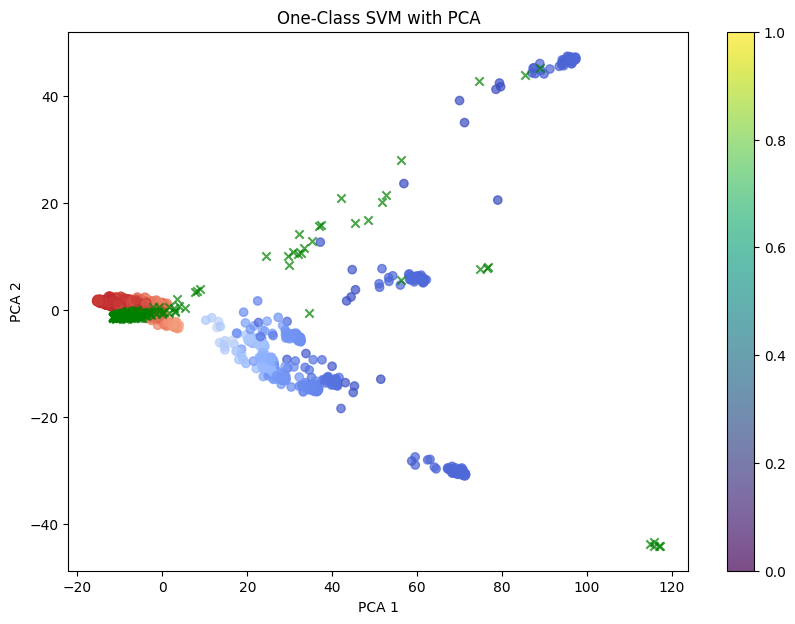

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca_results = pca.fit_transform(combined_data)
pca_results = pca.fit_transform(X_train)
tsne_results_same_pt = pca.fit_transform(same_pt)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=pred, cmap='coolwarm', alpha=0.7)
plt.scatter(tsne_results_same_pt[:, 0], tsne_results_same_pt[:, 1], marker='x', color='green', alpha=0.7, label='Test Data')
plt.title('One-Class SVM with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

### Evaluating model

In [33]:
y_pred_train = ocsvm.decision_function(X_train)
y_pred_test = ocsvm.decision_function(X_test)
n_error_train = y_pred_train[y_pred_train <= -400].size
n_error_test = y_pred_test[y_pred_test <= -400].size
print(f'error train: {n_error_train}/{len(X_train)} ; errors test: {n_error_test}/{len(X_test)}')

error train: 758/3880 ; errors test: 147/712


## Isolation Forest

In [34]:
from sklearn.ensemble import IsolationForest

# Assuming X_train contains your distance vectors of unique data points
X_train = scaled_data
X_test = scaled_test
# new_data = np.array([...])

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1)
iso_forest.fit(X_train)

# Combine training and new data for visualization
# combined_data = np.vstack([X_train, new_data])

# Predict on combined data

# pred = ocsvm.predict(combined_data)
pred = iso_forest.decision_function(X_train)
labels = ['Inlier' if p >= 0.5 else 'Outlier' for p in pred]


### T-SNE Dimensionality Reduction Visualization 

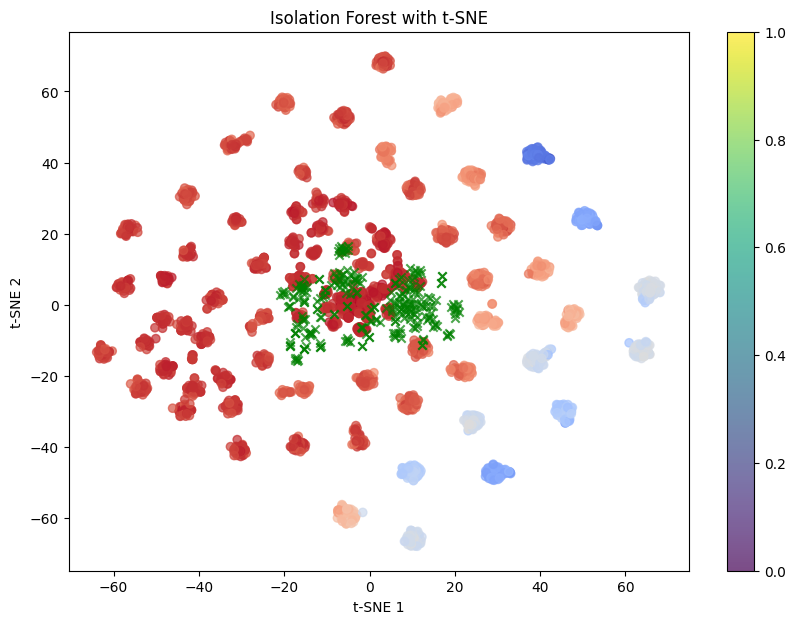

In [35]:
from sklearn.manifold import TSNE

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)

# tsne_results = tsne.fit_transform(combined_data)
tsne_results = tsne.fit_transform(X_train)
tsne_results_same_pt = tsne.fit_transform(same_pt)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=pred, cmap='coolwarm', alpha=0.7)
plt.scatter(tsne_results_same_pt[:, 0], tsne_results_same_pt[:, 1], marker='x', color='green', alpha=0.7, label='Test Data')
plt.title('Isolation Forest with t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()
plt.show()

### PCA Dimensionality Redution Visualization

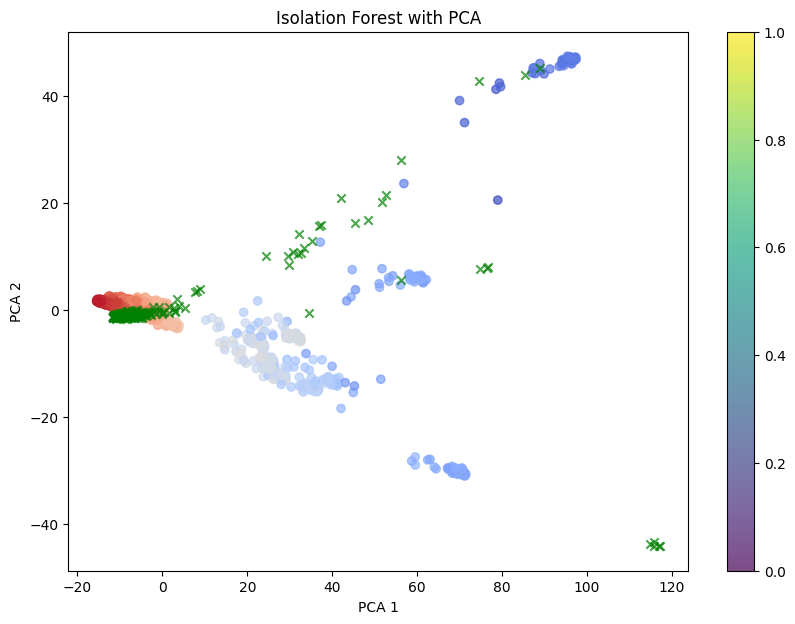

In [36]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# pca_results = pca.fit_transform(combined_data)
pca_results = pca.fit_transform(X_train)
tsne_results_same_pt = pca.fit_transform(same_pt)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(pca_results[:, 0], pca_results[:, 1], c=pred, cmap='coolwarm', alpha=0.7)
plt.scatter(tsne_results_same_pt[:, 0], tsne_results_same_pt[:, 1], marker='x', color='green', alpha=0.7, label='Test Data')
plt.title('Isolation Forest with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()

### Evaluating

In [37]:
y_pred_train = iso_forest.decision_function(X_train)
y_pred_test = iso_forest.decision_function(X_test)
n_error_train = y_pred_train[y_pred_train <= 0].size
n_error_test = y_pred_test[y_pred_test <= 0].size
print(f'error train: {n_error_train}/{len(X_train)} ; errors test: {n_error_test}/{len(X_test)}')

error train: 388/3880 ; errors test: 75/712


## Clustering

### K-Means

In [56]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])


# Definir el número de clusters
num_clusters = 2

# Crear y ajustar el modelo K-Means
wcss = []
for i in range(1, 300):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=1, )
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Añadir las etiquetas de los clusters al DataFrame original
# data['Cluster'] = kmeans.labels_





KeyboardInterrupt: 

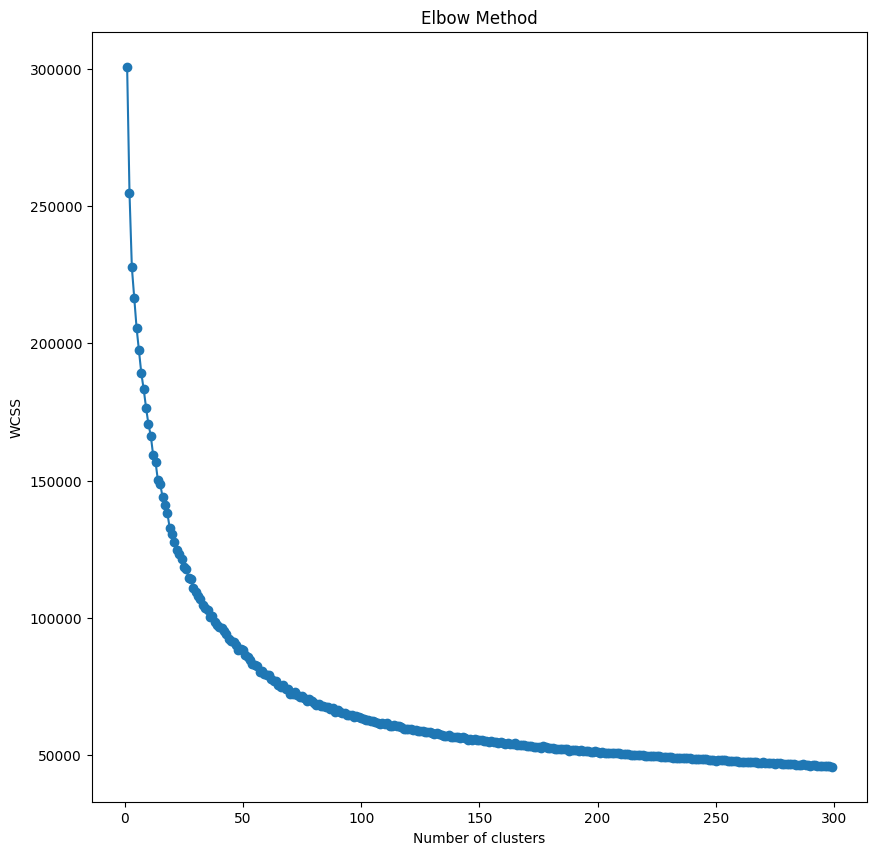

In [20]:
# Elbow method plotting
plt.figure(figsize=(10,10))
plt.plot(range(1, 300), wcss, marker = 'o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [21]:
# Create a pairplot with the specified colors
# sns.pairplot(component_wise_df, hue='Cluster', palette='tab10')
# plt.show()

### Agglomerative Clustering

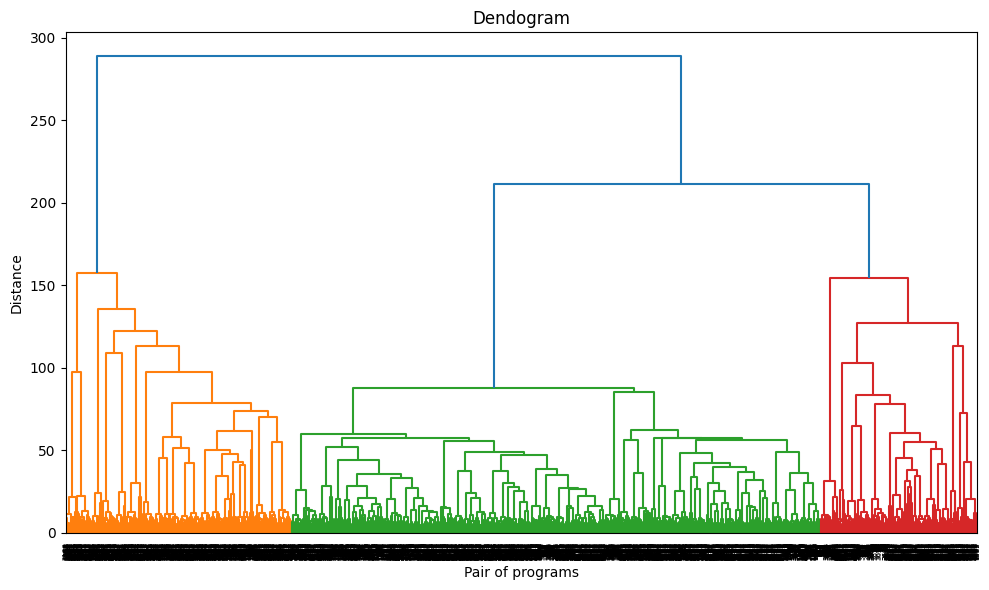

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(scaled_data, method='ward', metric='euclidean')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=data.index.values, orientation='top')
plt.title("Dendogram")
plt.xlabel("Pair of programs")
plt.ylabel("Distance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
from sklearn.cluster import AgglomerativeClustering

cluster_ward_1 = AgglomerativeClustering(n_clusters=90, linkage='ward')# For data of differences
cluster_ward_2 = AgglomerativeClustering(n_clusters=70, linkage='ward')

# cluster_ward_1 = AgglomerativeClustering(n_clusters=50, linkage='ward')
# cluster_ward_2 = AgglomerativeClustering(n_clusters=60, linkage='ward')

y_ward_1 = cluster_ward_1.fit_predict(scaled_data)
y_ward_2 = cluster_ward_2.fit_predict(scaled_data)

data['agglomerative_ward_2'] = y_ward_2
data['agglomerative_ward_1'] = y_ward_1

In [24]:
# Create a pairplot with the specified colors
# sns.pairplot(data, hue='agglomerative_ward_2', palette='viridis')
# plt.show()

In [25]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

silhouette_avg_agg_1 = silhouette_score(scaled_data, y_ward_1)
silhouette_avg_agg_2 = silhouette_score(scaled_data, y_ward_2)

davies_bouldin_avg_agg_1 = davies_bouldin_score(scaled_data, y_ward_1)
davies_bouldin_avg_agg_2 = davies_bouldin_score(scaled_data, y_ward_2)

calinski_harabasz_avg_agg_1 = calinski_harabasz_score(scaled_data, y_ward_1)
calinski_harabasz_avg_agg_2 = calinski_harabasz_score(scaled_data, y_ward_2)

# Look for values closer to one
print(f'Silhouette Score for x clusters: {silhouette_avg_agg_1}')
print(f'Silhouette Score for y clusters: {silhouette_avg_agg_2}')

# Look for bigger values
print(f'Calinski Harabaz Score for x clusters: {calinski_harabasz_avg_agg_1}')
print(f'Calinski Harabaz Score for y clusters: {calinski_harabasz_avg_agg_2}')

# Look for smaller values
print(f'Davies Bouldin Score for x clusters: {davies_bouldin_avg_agg_1}')
print(f'Davies Bouldin Score for y clusters: {davies_bouldin_avg_agg_2}')

Silhouette Score for x clusters: 0.22361797778872816
Silhouette Score for y clusters: 0.22064031235940088
Calinski Harabaz Score for x clusters: 186.19519508550314
Calinski Harabaz Score for y clusters: 208.69435498252133
Davies Bouldin Score for x clusters: 1.4983611529303968
Davies Bouldin Score for y clusters: 1.4821405008163318


## Siamese NN

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from SNN.siamese_network_parse import PrepareDataSNN

# Definir la arquitectura base
def create_base_network(input_shape):
    input = Input(shape=input_shape)
    x = Dense(128, activation='relu')(input)
    x = Dense(128, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    return Model(input, x)

# Definir la función de distancia
def euclidean_distance(vects):
    x, y = vects
    sum_square = K.sum(K.square(x - y), axis=1, keepdims=True)
    return K.sqrt(K.maximum(sum_square, K.epsilon()))

# Crear el modelo de red siamesa
def create_siamese_network(input_shape):
    base_network = create_base_network(input_shape)

    input_a = Input(shape=input_shape)
    input_b = Input(shape=input_shape)

    # Obtener las representaciones de las dos ramas
    processed_a = base_network(input_a)
    processed_b = base_network(input_b)

    # Calcular la distancia entre las dos salidas
    distance = Lambda(euclidean_distance, output_shape=(1,))([processed_a, processed_b])

    model = Model([input_a, input_b], distance)
    return model

# Definir la función de pérdida
def contrastive_loss(y_true, y_pred):
    margin = 1
    square_pred = K.square(y_pred)
    margin_square = K.square(K.maximum(margin - y_pred, 0))
    return K.mean(y_true * square_pred + (1 - y_true) * margin_square)

# Entrenar el modelo
def train_siamese_network(data_a, data_b, labels):
    input_shape = (data_a.shape[1],)
    model = create_siamese_network(input_shape)

    model.compile(loss=contrastive_loss, optimizer=Adam(learning_rate=0.001))

    model.fit([data_a, data_b], labels, batch_size=128, epochs=20)

# Ejecutar el entrenamiento
if __name__ == "__main__":
    data = PrepareDataSNN()
    data_a, data_b, labels = data.process()
    train_siamese_network(data_a, data_b, labels)


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import networkx as nx
from antlr4 import *
from antlr4 import CommonTokenStream
from Python.CSharpLexer import CSharpLexer
from Python.CSharpParser import CSharpParser
import json, os
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import to_agraph

class ASTToGraphVisitor:
    def __init__(self):
        self.graph = nx.DiGraph()  # Usamos un grafo dirigido
        self.node_count = 0

    def next_node_id(self):
        self.node_count += 1
        return self.node_count

    def add_node(self, node, label):
        node_id = self.next_node_id()
        self.graph.add_node(node_id, label=label)
        return node_id

    def visitChildren(self, node):
        current_node_id = self.add_node(node, type(node).__name__)
        for child in node.getChildren():
            if isinstance(child, TerminalNode):
                child_id = self.add_node(child, child.getText())
            else:
                child_id = self.visitChildren(child)
            self.graph.add_edge(current_node_id, child_id)
        return current_node_id

# Método para convertir un AST a un grafo
def convert_ast_to_graph(input_code):
    input_stream = InputStream(input_code)
    lexer = CSharpLexer(input_stream)
    stream = CommonTokenStream(lexer)
    parser = CSharpParser(stream)
    tree = parser.compilation_unit()  # Cambia 'startRule' por la regla inicial de tu gramática

    visitor = ASTToGraphVisitor()
    visitor.visitChildren(tree)
    return visitor.graph

# Método para dibujar el grafo utilizando matplotlib
def draw_graph(graph):
    agraph = to_agraph(graph)
    agraph.layout(prog='dot')  # Usar el motor 'dot' para el posicionamiento
    agraph.draw('ast_graph.png')  # Guardar el grafo como imagen PNG

# json_file_path = f'{os.getcwd()}/Projects/All/Ab3lucho_Moogle/Moogle-main/MoogleEngine/Query.cs'


# with open(json_file_path, 'r') as file:
#     code = file.read()
        
# graph = convert_ast_to_graph(code)

# # Imprimir el grafo
# print(len(graph.nodes))
# print(graph.nodes(data=True))
# print(graph.edges())




: 

In [ ]:
# Visualizar el grafo
# draw_graph(graph)

: 